<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,Unnamed: 0.1,Unnamed: 0,ResponseId,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,...,Frustration_Complexityoftechstackfordeployment,Frustration_Reliabilityoftools/systemsusedinwork,Frustration_Trackingmywork,Frustration_Patching/updatingcorecomponents,Frustration_Numberofsoftwaretoolsinuse,Frustration_Showingmycontributions,Frustration_Maintainingsecurityofcodebeingproduced,Frustration_Maintainingsecurityofsystems/platformsusedinwork,Frustration_Noneofthese,ExperienceRange
0,0,0,1,developer by profession,under 18,remote,Primary School,0.0,0.0,no answer,...,0,0,0,0,0,0,0,0,0,0-5
1,1,1,2,developer by profession,35-44,remote,Bachelor’s degree,20.0,17.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,10-20
2,2,2,3,developer by profession,45-54,remote,Master’s degree,37.0,27.0,Developer Experience,...,0,0,0,0,0,0,0,0,0,>20
3,3,3,4,learning to code,18-24,non answer,College without a degree,4.0,0.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,0-5
4,4,4,5,developer by profession,18-24,non answer,Secondary school,9.0,0.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,0-5


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   Unnamed: 0.1  Unnamed: 0  ResponseId               MainBranch       Age  \
0             0           0           1  developer by profession  under 18   
1             1           1           2  developer by profession     35-44   
2             2           2           3  developer by profession     45-54   
3             3           3           4         learning to code     18-24   
4             4           4           5  developer by profession     18-24   

   RemoteWork                   EdLevel  YearsCode  YearsCodePro  \
0      remote            Primary School        0.0           0.0   
1      remote         Bachelor’s degree       20.0          17.0   
2      remote           Master’s degree       37.0          27.0   
3  non answer  College without a degree        4.0           0.0   
4  non answer          Secondary school        9.0           0.0   

                 DevType  ... Frustration_Complexityoftechstackfordeployment  \
0              no answer  ...             

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24,14098
1,25-34,23911
2,35-44,14942
3,45-54,6249
4,55-64,2575
5,above 65,772
6,non answer,322
7,under 18,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"Unnamed: 0.1" INTEGER,
  "Unnamed: 0" INTEGER,
  "ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "RemoteWork" TEXT,
  "EdLevel" TEXT,
  "YearsCode" REAL,
  "YearsCodePro" REAL,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuildvsBuy" TEXT,
  "Country" TEXT,
  "CompTotal" REAL,
  "ICorPM" TEXT,
  "WorkExp" REAL,
  "TimeSearching" TEXT,
  "TimeAnswering" TEXT,
  "Industry" TEXT,
  "JobSatPoints_1" REAL,
  "JobSatPoints_4" REAL,
  "JobSatPoints_5" REAL,
  "JobSatPoints_6" REAL,
  "JobSatPoints_7" REAL,
  "JobSatPoints_8" REAL,
  "JobSatPoints_9" REAL,
  "JobSatPoints_10" REAL,
  "JobSatPoints_11" REAL,
  "ConvertedCompYearly" REAL,
  "JobSat" REAL,
  "Employment_Employedfull-time" INTEGER,
  "Employment_Independentcontractorfreelancerorself-employed" INTEGER,
  "Employment_Studentfull-time" INTEGER,
  "Employment_Employedpart-time" INTEGER,
  "Employment_Notemployedbutlookingforwork" INTEGER,
  "Employment_Studentpart-time" INTEGER,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [10]:
# Read the CSV file
df_survey = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df_survey.head()

,Unnamed: 0.1,Unnamed: 0,ResponseId,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,...,Frustration_Complexityoftechstackfordeployment,Frustration_Reliabilityoftools/systemsusedinwork,Frustration_Trackingmywork,Frustration_Patching/updatingcorecomponents,Frustration_Numberofsoftwaretoolsinuse,Frustration_Showingmycontributions,Frustration_Maintainingsecurityofcodebeingproduced,Frustration_Maintainingsecurityofsystems/platformsusedinwork,Frustration_Noneofthese,ExperienceRange
0,0,0,1,developer by profession,under 18,remote,Primary School,0.0,0.0,no answer,...,0,0,0,0,0,0,0,0,0,0-5
1,1,1,2,developer by profession,35-44,remote,Bachelor’s degree,20.0,17.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,10-20
2,2,2,3,developer by profession,45-54,remote,Master’s degree,37.0,27.0,Developer Experience,...,0,0,0,0,0,0,0,0,0,>20
3,3,3,4,learning to code,18-24,non answer,College without a degree,4.0,0.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,0-5
4,4,4,5,developer by profession,18-24,non answer,Secondary school,9.0,0.0,"Developer, full-stack",...,0,0,0,0,0,0,0,0,0,0-5


In [11]:
# Calculate the IQR
Q1 = df_survey['CompTotal'].quantile(0.25)
Q3 = df_survey['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_survey[(df_survey['CompTotal'] < lower_bound) | (df_survey['CompTotal'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

# Print statistics and outliers
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print(f"Number of Outliers: {num_outliers}")

Q1 (25th percentile): 0.0
Q3 (75th percentile): 114000.0
IQR: 114000.0
Lower Bound for Outliers: -171000.0
Upper Bound for Outliers: 285000.0
Number of Outliers: 7918


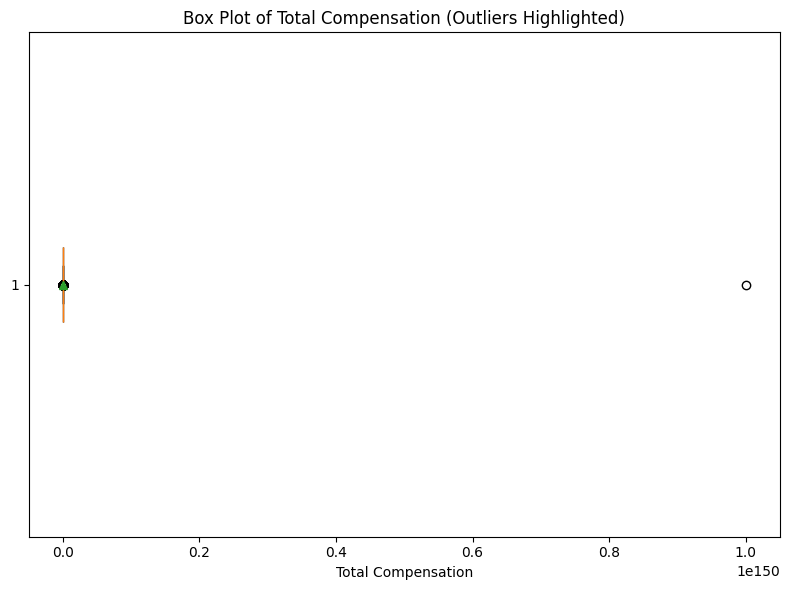

In [12]:
# Visualize using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_survey['CompTotal'].dropna(), vert=False, patch_artist=True, showmeans=True)
plt.title('Box Plot of Total Compensation (Outliers Highlighted)')
plt.xlabel('Total Compensation')
plt.tight_layout()
plt.show()

In [13]:
# Handle outliers
# Replace values greater than the upper bound with 0
df_survey.loc[df_survey['CompTotal'] > upper_bound, 'CompTotal'] = 0

In [14]:
df_survey.to_csv('survey-data.csv')


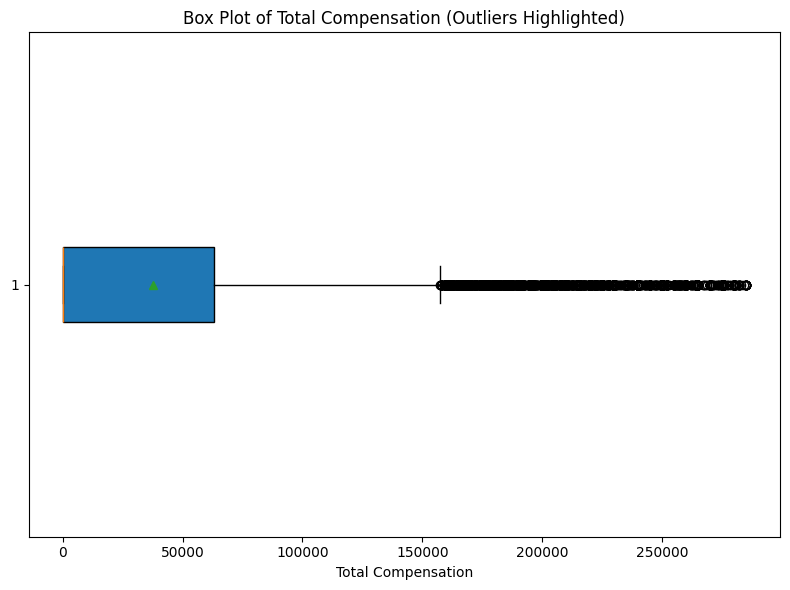

In [15]:
# Visualize using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_survey['CompTotal'].dropna(), vert=False, patch_artist=True, showmeans=True)
plt.title('Box Plot of Total Compensation (Outliers Highlighted)')
plt.xlabel('Total Compensation')
plt.tight_layout()
plt.show()

In [16]:
df_filtered = df_survey.loc[df_survey['CompTotal'] != 0]

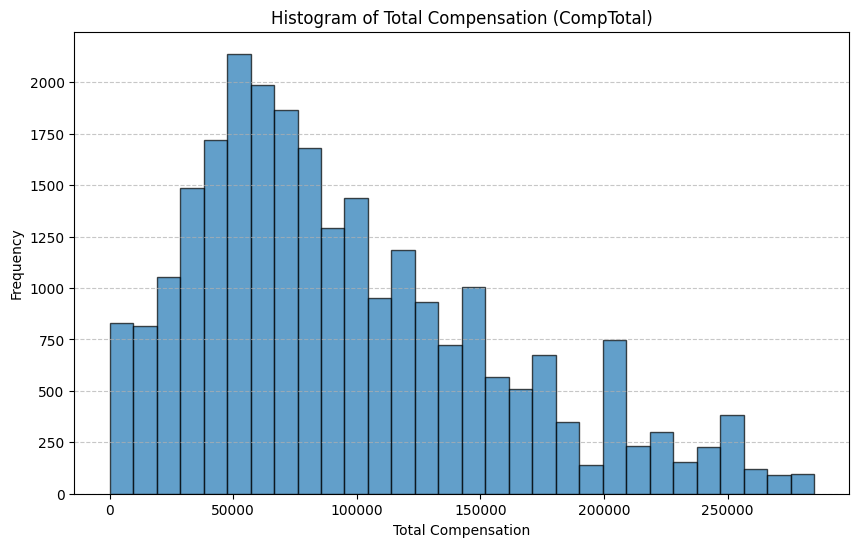

In [17]:
# Plot a histogram of CompTotal (Total Compensation)
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Box Plots**

Plot a box plot of Age.


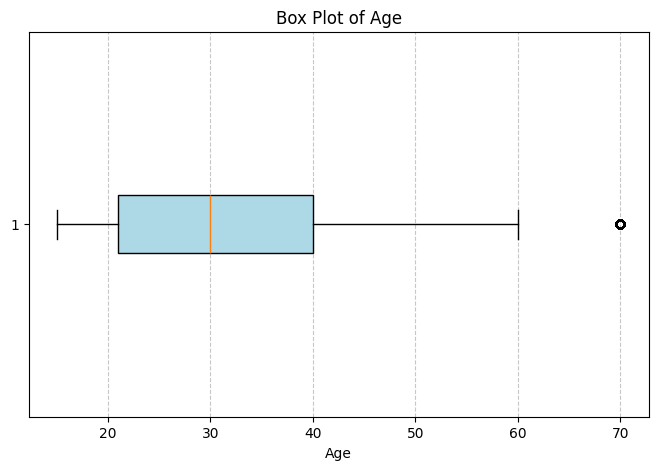

In [18]:
# Map age categories to numeric values (midpoints of ranges)
age_mapping = {
    'under 18': 15,
    '18-24': 21,
    '25-34': 30,
    '35-44': 40,
    '45-54': 50,
    '55-64': 60,
    'above 65': 70,
    'non answer': None  # Exclude 'non answer'
}

# Apply the mapping
df_survey['AgeNumeric'] = df_survey['Age'].map(age_mapping)

# Drop NaN values from the new numeric column
df_filtered = df_survey.dropna(subset=['AgeNumeric'])

# Plot a box plot of Age
plt.figure(figsize=(8, 5))
plt.boxplot(df_filtered['AgeNumeric'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


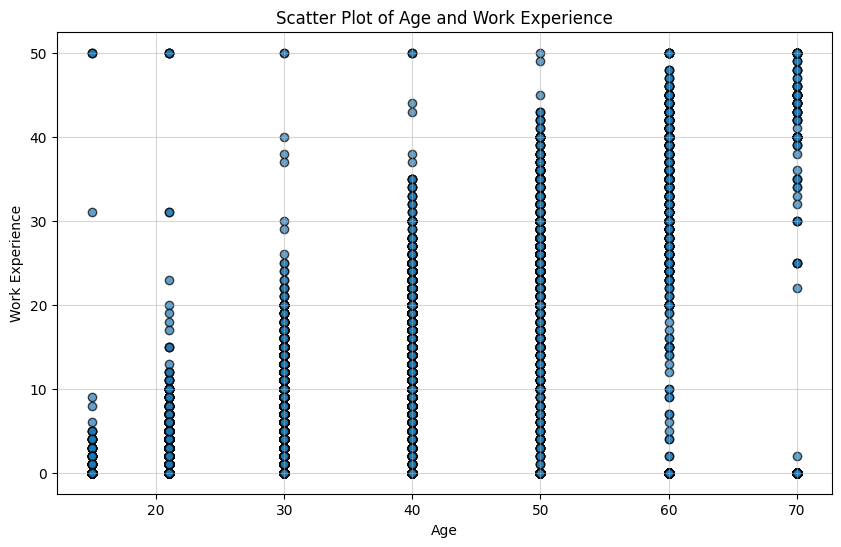

In [19]:
# Create a scatter plot of Age and WorkExp
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['AgeNumeric'], df_filtered['WorkExp'], alpha=0.7, edgecolor='k')
plt.title('Scatter Plot of Age and Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.grid(alpha=0.5)
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [20]:
df_filtered.TimeSearching.value_counts()

TimeSearching
no answer         36252
30-60 min/day     10939
15-30 min/day      7794
60-120 min/day     5266
<15 min/day        2681
>120 min/day       2183
Name: count, dtype: int64

In [21]:
# Map TimeSearching categories to numeric values (midpoints of ranges)
TimeSearching_mapping = {
    '<15 min/day': 10,
    '15-30 min/day': 23,
    '30-60 min/day': 45,
    '60-120 min/day': 90,
    '>120 min/day': 150,
    'no answer': None  # Exclude 'non answer'
}

# Apply the mapping
df_filtered['TimeSearchingNumeric'] = df_filtered['TimeSearching'].map(TimeSearching_mapping)

# Drop NaN values from the new numeric column
df_filtered = df_filtered.dropna(subset=['TimeSearchingNumeric'])

C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_25652\306189333.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TimeSearchingNumeric'] = df_filtered['TimeSearching'].map(TimeSearching_mapping)


In [35]:
# Calculate total frustration
frustration_columns = [
    'Frustration_Amountoftechnicaldebt',
    'Frustration_Complexityoftechstackforbuild',
    'Frustration_Complexityoftechstackfordeployment',
    'Frustration_Reliabilityoftools/systemsusedinwork',
    'Frustration_Trackingmywork',
    'Frustration_Patching/updatingcorecomponents',
    'Frustration_Numberofsoftwaretoolsinuse',
    'Frustration_Showingmycontributions',
    'Frustration_Maintainingsecurityofcodebeingproduced',
    'Frustration_Maintainingsecurityofsystems/platformsusedinwork',
    'Frustration_Noneofthese'
]
df_filtered['Frustration'] = df_filtered[frustration_columns].sum(axis=1)


In [36]:
from sklearn.preprocessing import MinMaxScaler

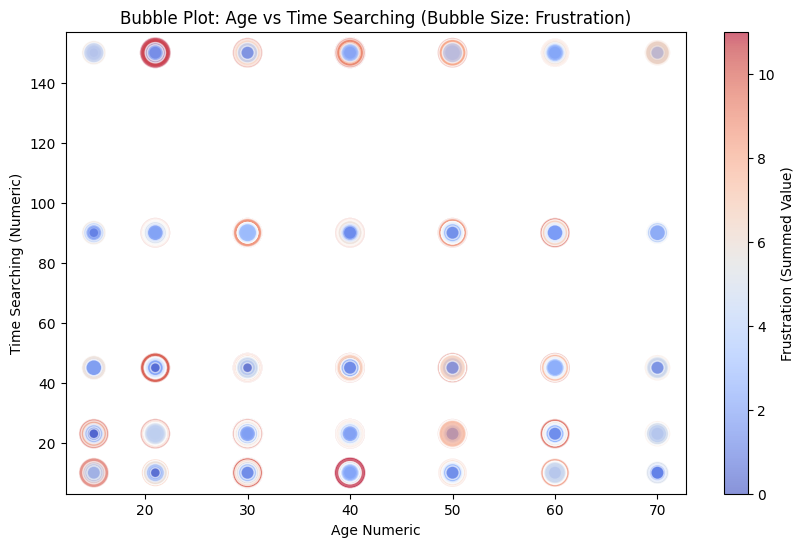

In [38]:
# Нормализация размеров пузырьков для лучшей визуализации
scaler = MinMaxScaler(feature_range=(50, 500))  # Размер пузырьков от 50 до 500
df_filtered['FrustrationScaled'] = scaler.fit_transform(df_filtered[['Frustration']])

# Создание графика
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_filtered['AgeNumeric'],  # Ось X
    df_filtered['TimeSearchingNumeric'],  # Ось Y
    s=df_filtered['FrustrationScaled'],  # Размер пузырьков
    alpha=0.6,
    edgecolors="w",
    c=df_filtered['Frustration'],  # Цвет пузырьков
    cmap='coolwarm'
)

# Добавляем цветовую шкалу
plt.colorbar(scatter, label='Frustration (Summed Value)')

# Подписываем оси
plt.xlabel('Age Numeric')
plt.ylabel('Time Searching (Numeric)')
plt.title('Bubble Plot: Age vs Time Searching (Bubble Size: Frustration)')

# Показываем график
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


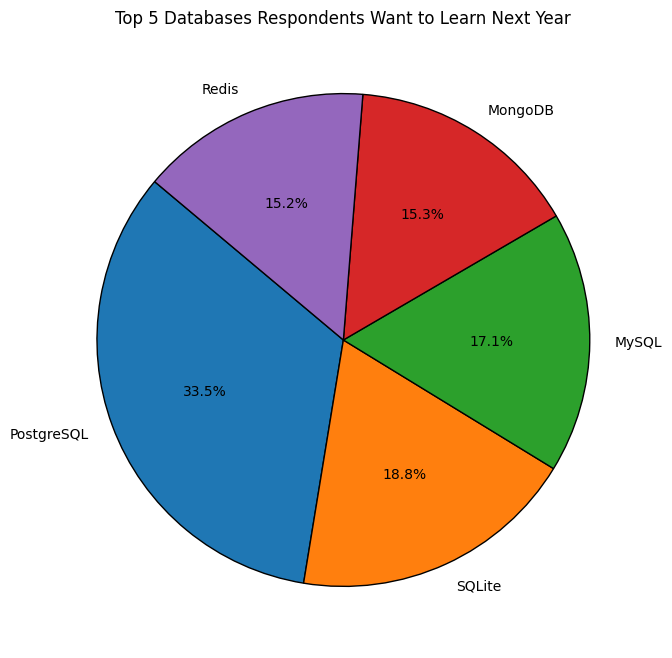

In [41]:
# Select columns related to "DatabaseWantToWorkWith"
database_columns = [col for col in df_survey.columns if col.startswith('DatabaseWantToWorkWith_')]

# Sum values in each database column to get total counts
database_counts = df_survey[database_columns].sum().sort_values(ascending=False)

# Extract the top 5 databases
top_5_databases = database_counts.head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_5_databases,
    labels=top_5_databases.index.str.replace('DatabaseWantToWorkWith_', ''),  # Simplify labels
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Add a title
plt.title('Top 5 Databases Respondents Want to Learn Next Year')

# Show the chart
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [42]:
df_filtered.TimeAnswering.value_counts()

TimeAnswering
15-30 min/day     9294
30-60 min/day     8601
<15 min/day       5884
60-120 min/day    3694
>120 min/day      1230
no answer          160
Name: count, dtype: int64

In [43]:
# Map TimeSearching categories to numeric values (midpoints of ranges)
TimeAnswering_mapping = {
    '<15 min/day': 10,
    '15-30 min/day': 23,
    '30-60 min/day': 45,
    '60-120 min/day': 90,
    '>120 min/day': 150,
    'no answer': None  # Exclude 'non answer'
}

# Apply the mapping
df_filtered['TimeAnsweringNumeric'] = df_filtered['TimeAnswering'].map(TimeAnswering_mapping)

# Drop NaN values from the new numeric column
df_filtered = df_filtered.dropna(subset=['TimeAnsweringNumeric'])

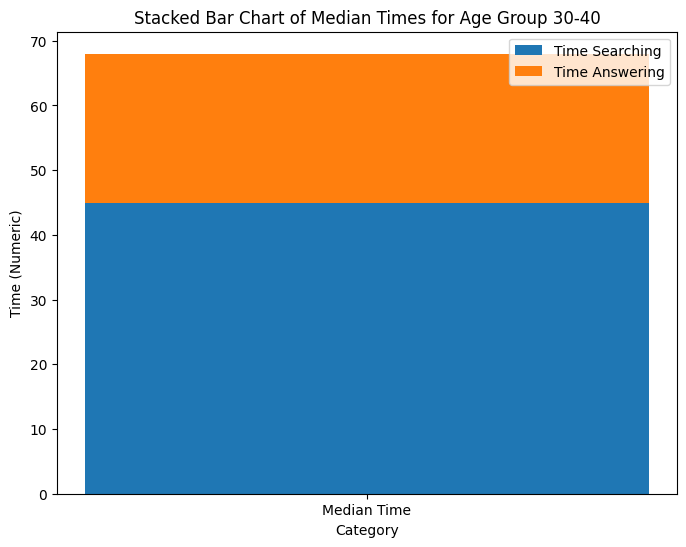

In [54]:
# Filter data for the age group 30 to 40
filtered_df_age_30_35 = df_filtered[(df_filtered['AgeNumeric'] > 25) & (df_filtered['AgeNumeric'] < 45)]

# Calculate the median values for each column
median_time_searching = filtered_df_age_30_35['TimeSearchingNumeric'].median()
median_time_answering = filtered_df_age_30_35['TimeAnsweringNumeric'].median()

# Data for the stacked bar chart
categories = ['Median Time']
time_searching_values = [median_time_searching]
time_answering_values = [median_time_answering]

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, time_searching_values, label='Time Searching')
plt.bar(categories, time_answering_values, bottom=time_searching_values, label='Time Answering')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Time (Numeric)')
plt.title('Stacked Bar Chart of Median Times for Age Group 30-40')
plt.legend()

# Show the plot
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


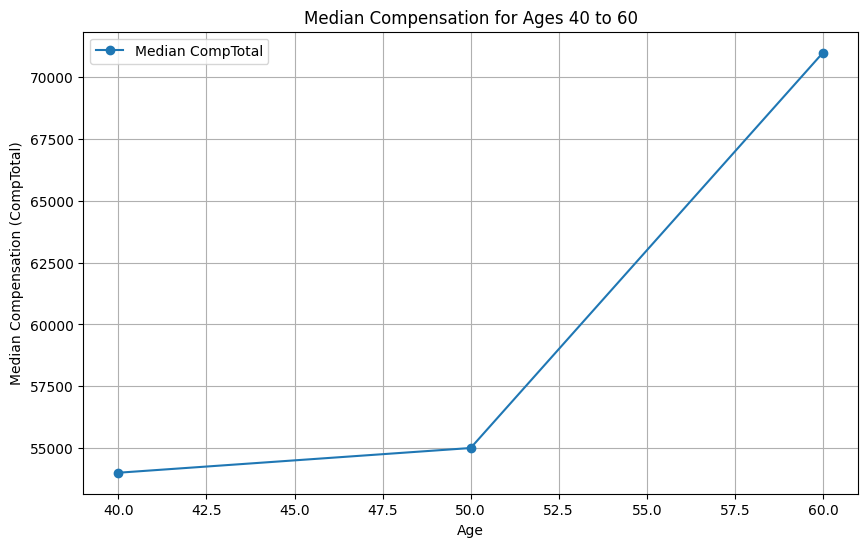

In [55]:
# Filter data for ages between 40 and 60
filtered_df_45_60 = df_filtered[(df_filtered['AgeNumeric'] > 35) & (df_filtered['AgeNumeric'] < 65)]

# Group by Age and calculate the median of CompTotal
median_comp_total = filtered_df_45_60.groupby('AgeNumeric')['CompTotal'].median()

# Plot the median CompTotal for each age
plt.figure(figsize=(10, 6))
plt.plot(median_comp_total.index, median_comp_total.values, marker='o', linestyle='-', label='Median CompTotal')

# Add labels, title, and grid
plt.xlabel('Age')
plt.ylabel('Median Compensation (CompTotal)')
plt.title('Median Compensation for Ages 40 to 60')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [56]:
df_survey['MainBranch'].value_counts()

MainBranch
developer by profession                   50207
code sometimes as part of work/studies     6511
learning to code                           3875
code as a hobby                            3334
used to be a developer by profession       1510
Name: count, dtype: int64

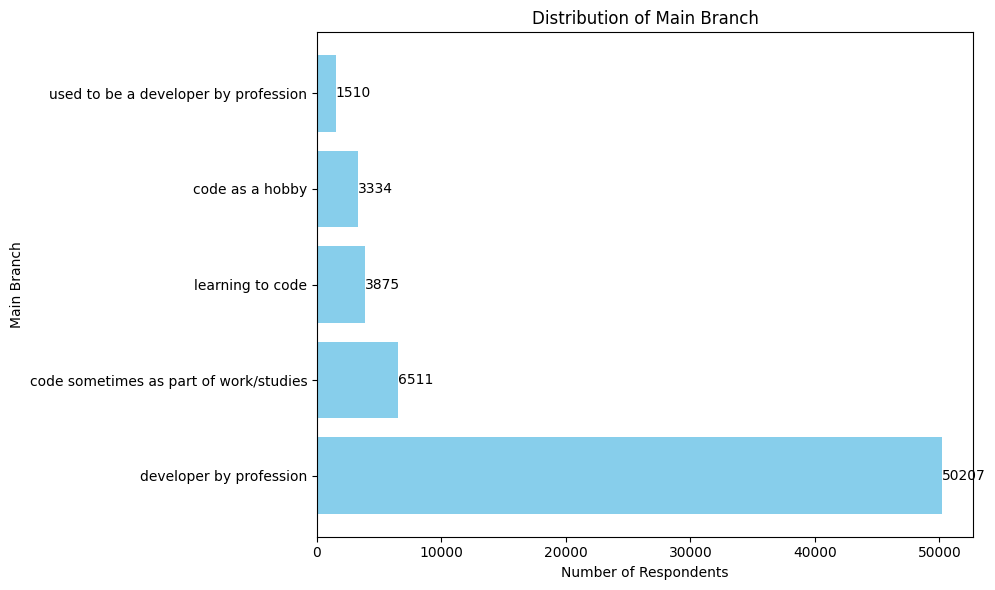

In [58]:
# Count the occurrences of each unique value in the MainBranch column
mainbranch_counts = df_survey['MainBranch'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(mainbranch_counts.index, mainbranch_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branch')

# Add value annotations for better readability
for i, value in enumerate(mainbranch_counts.values):
    plt.text(value, i, str(value), va='center')

# Show the plot
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [59]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
